Import twentyeleven.csv
•	Drop duplicates if any from the dataset.
•	get the week , to get the day of the week, the month and the year from invoice date column.
•	Make a new column and called it month year with the month name and year.
•	Get the last purchase date per customer
•	get the recency per customer
•	apply two weeks and one week moving average  for sales on the data .
•	resample the data to weekly data using the sum of all observations on that week.


In [1]:
import pandas as pd

from datetime import datetime
import numpy as np

In [2]:
retail= pd.read_csv('twentyeleven.csv',parse_dates=True)

In [3]:
retail.shape

(484330, 11)

In [5]:
retail=retail.drop_duplicates()
retail.shape

(484330, 11)

In [6]:
retail=retail.dropna(axis=0, how='any')
retail.shape

(367058, 11)

In [7]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367058 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      367058 non-null  float64
 1   StockCode    367058 non-null  object 
 2   Description  367058 non-null  object 
 3   Quantity     367058 non-null  int64  
 4   InvoiceDate  367058 non-null  object 
 5   Price        367058 non-null  float64
 6   Customer ID  367058 non-null  float64
 7   Country      367058 non-null  object 
 8   date         367058 non-null  object 
 9   revenue      367058 non-null  float64
 10  year         367058 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 33.6+ MB


In [9]:
retail.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04T10:00:00Z,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011


get the week , to get the day of the week, the month and the year from invoice date column.

In [10]:
retail['InvoiceDate']=pd.to_datetime(retail.InvoiceDate)

In [11]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367058 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   Invoice      367058 non-null  float64            
 1   StockCode    367058 non-null  object             
 2   Description  367058 non-null  object             
 3   Quantity     367058 non-null  int64              
 4   InvoiceDate  367058 non-null  datetime64[ns, UTC]
 5   Price        367058 non-null  float64            
 6   Customer ID  367058 non-null  float64            
 7   Country      367058 non-null  object             
 8   date         367058 non-null  object             
 9   revenue      367058 non-null  float64            
 10  year         367058 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(2), object(4)
memory usage: 33.6+ MB


In [12]:
#week
retail['InvoiceDate'].dt.week.head(2)

C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


0    1
1    1
Name: InvoiceDate, dtype: int64

In [13]:
#day of week
retail['InvoiceDate'].dt.day.head(2)

0    4
1    4
Name: InvoiceDate, dtype: int64

In [14]:
#month
retail['InvoiceDate'].dt.month.head(2)

0    1
1    1
Name: InvoiceDate, dtype: int64

In [15]:
#year
retail['InvoiceDate'].dt.year.head(2)

0    2011
1    2011
Name: InvoiceDate, dtype: int64

•	Make a new column and called it month year with the month name and year.

In [18]:
retail['Month_year']=retail['InvoiceDate'].dt.strftime('%B %Y')

In [19]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367058 entries, 0 to 484329
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   Invoice      367058 non-null  float64            
 1   StockCode    367058 non-null  object             
 2   Description  367058 non-null  object             
 3   Quantity     367058 non-null  int64              
 4   InvoiceDate  367058 non-null  datetime64[ns, UTC]
 5   Price        367058 non-null  float64            
 6   Customer ID  367058 non-null  float64            
 7   Country      367058 non-null  object             
 8   date         367058 non-null  object             
 9   revenue      367058 non-null  float64            
 10  year         367058 non-null  int64              
 11  Month_year   367058 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(4), int64(2), object(5)
memory usage: 36.4+ MB


•	Get the last purchase date per customer

In [20]:
last_purchase_Date=retail.groupby('Customer ID',as_index=False)['InvoiceDate'].max()
last_purchase_Date

,Customer ID,InvoiceDate
0,12347.0,2011-12-07 15:52:00+00:00
1,12348.0,2011-09-25 13:13:00+00:00
2,12349.0,2011-11-21 09:51:00+00:00
3,12350.0,2011-02-02 16:01:00+00:00
4,12352.0,2011-11-03 14:37:00+00:00
...,...,...
4214,18280.0,2011-03-07 09:52:00+00:00
4215,18281.0,2011-06-12 10:53:00+00:00
4216,18282.0,2011-12-02 11:43:00+00:00
4217,18283.0,2011-12-06 12:02:00+00:00


In [21]:
last_purchase_Date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4219 entries, 0 to 4218
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Customer ID  4219 non-null   float64            
 1   InvoiceDate  4219 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(1)
memory usage: 98.9 KB


•	get the recency per customer

* recency = maximum date - last_purchase_Date

In [23]:
max_date=retail.InvoiceDate.max()
max_date

Timestamp('2011-12-09 12:50:00+0000', tz='UTC')

In [24]:
last_purchase_Date['Recency']=max_date-last_purchase_Date['InvoiceDate']
last_purchase_Date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4219 entries, 0 to 4218
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Customer ID  4219 non-null   float64            
 1   InvoiceDate  4219 non-null   datetime64[ns, UTC]
 2   Recency      4219 non-null   timedelta64[ns]    
dtypes: datetime64[ns, UTC](1), float64(1), timedelta64[ns](1)
memory usage: 131.8 KB


In [25]:
last_purchase_Date.head(4)

,Customer ID,InvoiceDate,Recency
0,12347.0,2011-12-07 15:52:00+00:00,1 days 20:58:00
1,12348.0,2011-09-25 13:13:00+00:00,74 days 23:37:00
2,12349.0,2011-11-21 09:51:00+00:00,18 days 02:59:00
3,12350.0,2011-02-02 16:01:00+00:00,309 days 20:49:00


Extract only days fromthe timedelta type

In [27]:
last_purchase_Date['Recency_days']=last_purchase_Date['Recency'].dt.components['days']
last_purchase_Date.head(2)

,Customer ID,InvoiceDate,Recency,Recency_days
0,12347.0,2011-12-07 15:52:00+00:00,1 days 20:58:00,1
1,12348.0,2011-09-25 13:13:00+00:00,74 days 23:37:00,74


•	apply two weeks and one week moving average  for sales on the data.

In [22]:
last_purchase_Date['Customer ID'].unique()

array([12347., 12348., 12349., ..., 18282., 18283., 18287.])

In [28]:
last_purchase_Date['date']=last_purchase_Date['InvoiceDate'].dt.strftime('%Y-%m-%d')

In [29]:
last_purchase_Date.head(4)

,Customer ID,InvoiceDate,Recency,Recency_days,date
0,12347.0,2011-12-07 15:52:00+00:00,1 days 20:58:00,1,2011-12-07
1,12348.0,2011-09-25 13:13:00+00:00,74 days 23:37:00,74,2011-09-25
2,12349.0,2011-11-21 09:51:00+00:00,18 days 02:59:00,18,2011-11-21
3,12350.0,2011-02-02 16:01:00+00:00,309 days 20:49:00,309,2011-02-02


In [30]:
import matplotlib.pyplot as plt

In [31]:
retail.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'date', 'revenue', 'year',
       'Month_year'],
      dtype='object')

In [36]:
retail.groupby('date')[['Quantity']].sum()

,Quantity
date,
2011-01-04,6950
2011-01-05,18369
2011-01-06,21582
2011-01-07,15122
2011-01-09,8125
...,...
2011-12-05,38347
2011-12-06,27736
2011-12-07,41011


In [48]:
# retail date is an object
retail['date']=pd.to_datetime(retail['date'])
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367058 entries, 0 to 484329
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   Invoice      367058 non-null  float64            
 1   StockCode    367058 non-null  object             
 2   Description  367058 non-null  object             
 3   Quantity     367058 non-null  int64              
 4   InvoiceDate  367058 non-null  datetime64[ns, UTC]
 5   Price        367058 non-null  float64            
 6   Customer ID  367058 non-null  float64            
 7   Country      367058 non-null  object             
 8   date         367058 non-null  datetime64[ns]     
 9   revenue      367058 non-null  float64            
 10  year         367058 non-null  int64              
 11  Month_year   367058 non-null  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 44.5+ MB


In [49]:
retail.head(4)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year,Month_year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00+00:00,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011,January 2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00+00:00,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011,January 2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00+00:00,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011,January 2011
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00+00:00,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011,January 2011


In [50]:
# OR
moving_av= retail.groupby('date').agg(total_sales=('Quantity','sum'))
moving_av

,total_sales
date,
2011-01-04,6950
2011-01-05,18369
2011-01-06,21582
2011-01-07,15122
2011-01-09,8125
...,...
2011-12-05,38347
2011-12-06,27736
2011-12-07,41011


<AxesSubplot:xlabel='date'>

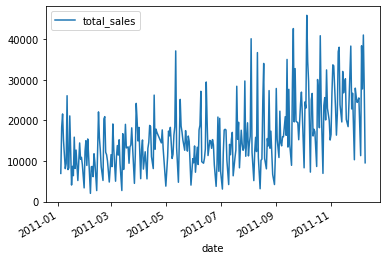

In [51]:
moving_av.plot()

In [52]:
moving_av.columns

Index(['total_sales'], dtype='object')

In [53]:
moving_av['moving_7']=moving_av.rolling(window=7).mean()
moving_av['moving_14']=moving_av['total_sales'].rolling(window=14).mean()

In [54]:
moving_av.head(15)

,total_sales,moving_7,moving_14
date,,,
2011-01-04,6950,NaN,NaN
2011-01-05,18369,NaN,NaN
2011-01-06,21582,NaN,NaN
2011-01-07,15122,NaN,NaN
2011-01-09,8125,NaN,NaN
2011-01-10,9380,NaN,NaN
2011-01-11,26072,15085.714286,NaN
2011-01-12,7883,15219.000000,NaN
2011-01-13,8310,13782.000000,NaN


In [55]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367058 entries, 0 to 484329
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   Invoice      367058 non-null  float64            
 1   StockCode    367058 non-null  object             
 2   Description  367058 non-null  object             
 3   Quantity     367058 non-null  int64              
 4   InvoiceDate  367058 non-null  datetime64[ns, UTC]
 5   Price        367058 non-null  float64            
 6   Customer ID  367058 non-null  float64            
 7   Country      367058 non-null  object             
 8   date         367058 non-null  datetime64[ns]     
 9   revenue      367058 non-null  float64            
 10  year         367058 non-null  int64              
 11  Month_year   367058 non-null  object             
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 44.5+ MB


C:\Users\aduzo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='date'>

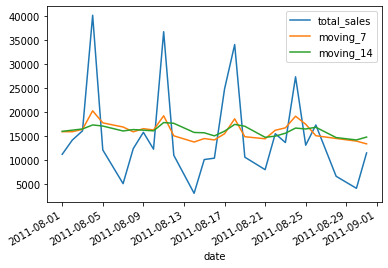

In [56]:
moving_av['Aug-2011'].plot()

•	resample the data to weekly data using the sum of all observations on that week.

In [59]:
weekly_series_sum=moving_av[['total_sales']].resample('W').sum()
weekly_series_sum

,total_sales
date,
2011-01-09,70148
2011-01-16,76829
2011-01-23,57016
2011-01-30,57897
2011-02-06,65037
2011-02-13,47456
2011-02-20,76725
2011-02-27,79855
2011-03-06,65636
